# Time series: motif and shaplet

Motif: a repeated pattern in the time series.
We can discover motif by computing the Matrix Profile: a data structure that annotates time series by using a sliding window to compare the pairwise distance among the subsequences.

### Matrix Profile
the matrix profile stores the index of the subsequences

You can use these packages:
    
    
https://github.com/target/matrixprofile-ts

https://github.com/TDAmeritrade/stumpy

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matrixprofile import *

In [12]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
df = pd.read_csv('./datasets/AirPassengers.csv', parse_dates=True, index_col='Month', date_parser=dateparse)
df.head()

C:\Users\giaco\AppData\Local\Temp\ipykernel_18868\1474780303.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


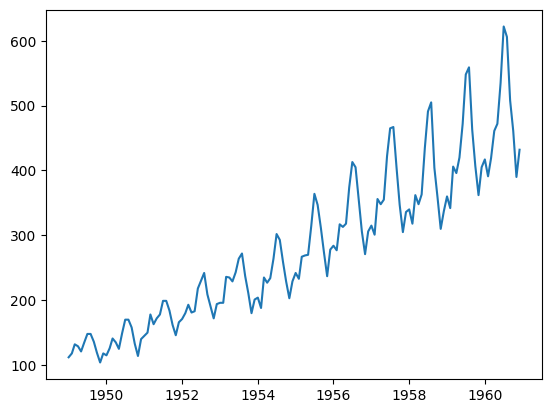

In [13]:
ts = df['#Passengers']
plt.plot(ts)
plt.show()

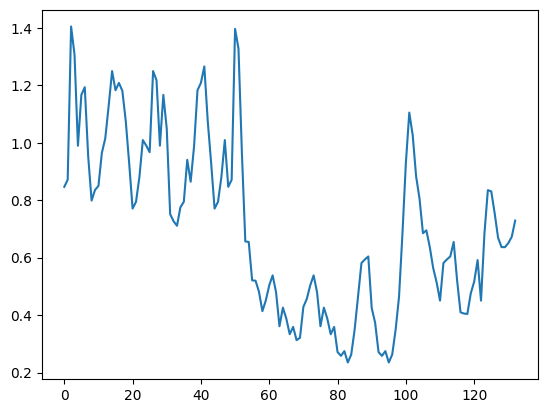

In [14]:
w = 12
mp, mpi = matrixProfile.stomp(ts.values, w)

plt.plot(mp)
plt.show()

# the lowest pick on this plot represent the motifs,
# on y axes we have distances on x axes we have index

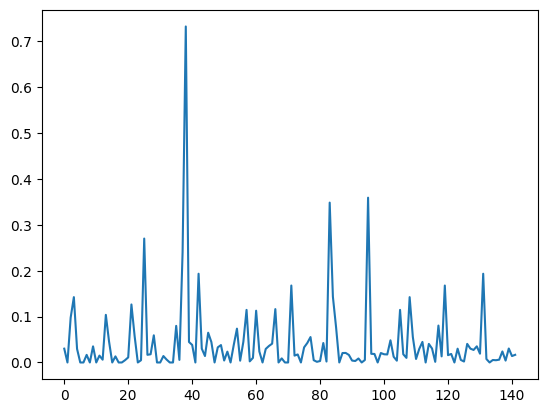

In [15]:
w = 3
mp, mpi = matrixProfile.stomp(ts.values, w)

plt.plot(mp)
plt.show()

### Motif discovery
Parameters
- max_motifs: stop finding new motifs once we have max_motifs
- radius: For each motif found, find neighbors that are within radius*motif_mp of the first.
- n_neighbors: number of neighbors from the first to find. If it is None, find all.
- ex_zone: minimum distance between indices for after each subsequence is identified. Defaults to m/2 where m is the subsequence length. If ex_zone = 0, only the found index is exclude, if ex_zone = 1 then if idx is found as a motif idx-1, idx, idx+1 are excluded.


The function returns a tuple (top_motifs, distances) which are lists of the same length.

- top_motifs: This is a list of the indices found for each motif. The first index is the nth motif followed by all nearest neighbors found sorted by distances.
- distances: Minimum Matrix profile value for each motif set.

In [16]:
mo, mod  = motifs.motifs(ts.values, (mp, mpi), max_motifs=5)

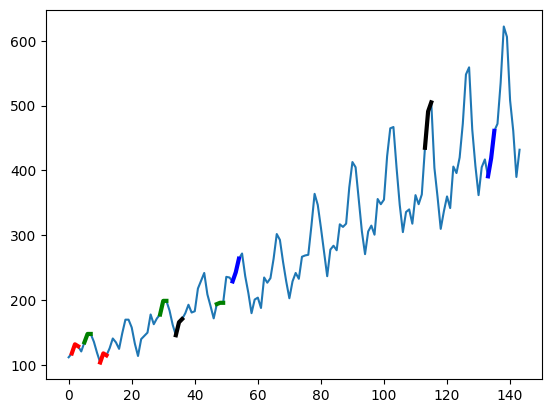

In [17]:
plt.plot(ts.values)
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo)]
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = ts.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)

plt.show()

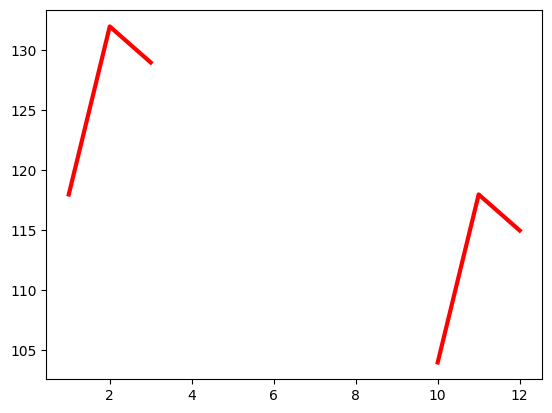

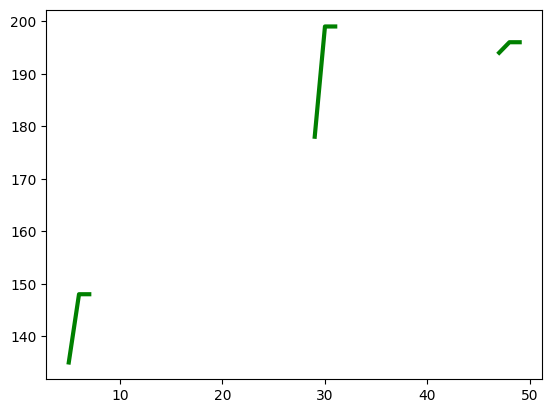

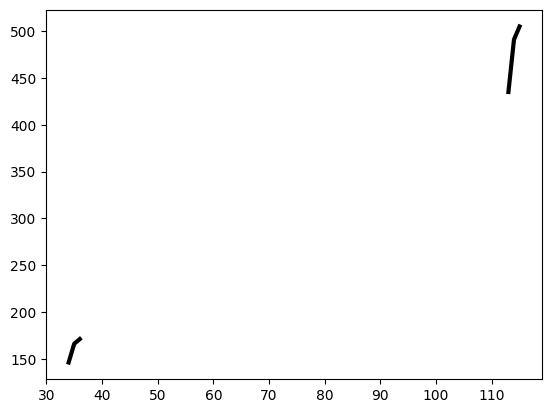

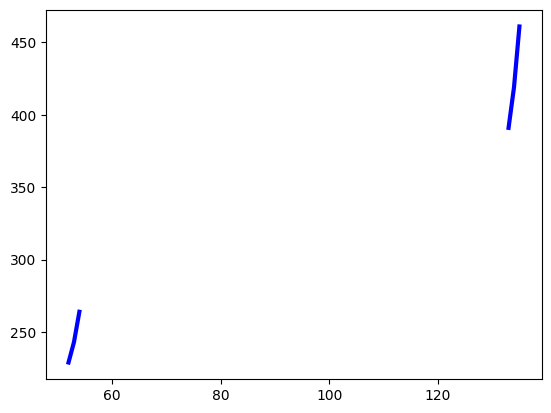

In [18]:
# visualize the motifs separately without the timeseries
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = ts.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
    plt.show()

### Shaplet discovery

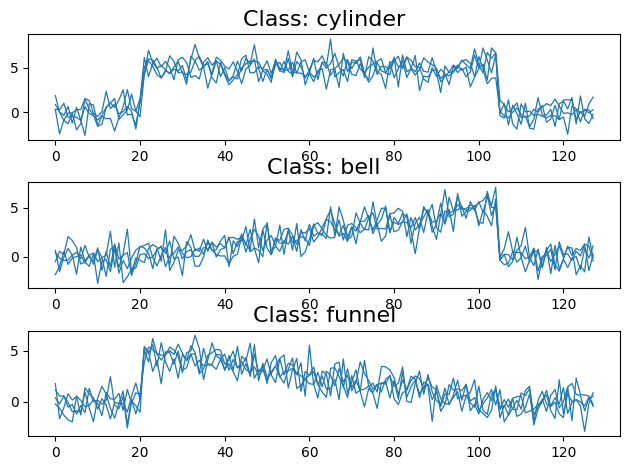

In [19]:
from pyts.datasets import make_cylinder_bell_funnel

# make a dataset
X, y = make_cylinder_bell_funnel(n_samples=12, random_state=42)

plt.figure()
for i, classe in enumerate(['cylinder', 'bell', 'funnel']):
    plt.subplot(3, 1, i + 1)
    for x in X[y == i]:
        plt.plot(x, color='C0', linewidth=0.9)
    plt.title('Class: {}'.format(classe), fontsize=16)

plt.tight_layout()
plt.subplots_adjust(hspace=0.4)
plt.show()

In [20]:
from tslearn.shapelets import ShapeletModel
from tslearn.shapelets import grabocka_params_to_shapelet_size_dict

from tslearn.preprocessing import TimeSeriesScalerMinMax

#import tensorflow as tf
#optimizer = tf.keras.optimizers.Adagrad



ModuleNotFoundError: No module named 'tensorflow.compat'

In [22]:
n_ts, ts_sz = X.shape
n_classes = len(set(y))

shapelet_sizes = grabocka_params_to_shapelet_size_dict(n_ts=n_ts,
                                                       ts_sz=ts_sz,
                                                       n_classes=n_classes,
                                                       l=0.1,
                                                       r=1)

print('n_ts', n_ts)
print('ts_sz', ts_sz)
print('n_classes', n_classes)
print('shapelet_sizes', shapelet_sizes)

n_ts 12
ts_sz 128
n_classes 3
shapelet_sizes {12: 3}


In [23]:
shp_clf = ShapeletModel(n_shapelets_per_size=shapelet_sizes,
                        optimizer="sgd",
                        weight_regularizer=.01,
                        max_iter=200,
                        verbose=1)

/Users/narets/opt/anaconda3/envs/generic_latest/lib/python3.7/site-packages/tslearn/shapelets/shapelets.py:357: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  FutureWarning)


In [24]:
shp_clf.fit(X, y)

2021-11-18 23:18:37.949335: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-18 23:18:43.333812: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/200
1/1 [==============================] - 1s 799ms/step - loss: 1.0914 - categorical_accuracy: 0.3333 - categorical_crossentropy: 1.0706
Epoch 2/200
1/1 [==============================] - 0s 4ms/step - loss: 1.0880 - categorical_accuracy: 0.3333 - categorical_crossentropy: 1.0672
Epoch 3/200
1/1 [==============================] - 0s 3ms/step - loss: 1.0846 - categorical_accuracy: 0.3333 - categorical_crossentropy: 1.0639
Epoch 4/200
1/1 [==============================] - 0s 3ms/step - loss: 1.0813 - categorical_accuracy: 0.3333 - categorical_crossentropy: 1.0607
Epoch 5/200
1/1 [==============================] - 0s 3ms/step - loss: 1.0780 - categorical_accuracy: 0.3333 - categorical_crossentropy: 1.0575
Epoch 6/200
1/1 [==============================] - 0s 3ms/step - loss: 1.0747 - categorical_accuracy: 0.3333 - categorical_crossentropy: 1.0543
Epoch 7/200
1/1 [==============================] - 0s 3ms/step - loss: 1.0716 - categorical_accuracy: 0.3333 - categorical_crossentrop

1/1 [==============================] - 0s 2ms/step - loss: 0.8738 - categorical_accuracy: 0.5833 - categorical_crossentropy: 0.8567
Epoch 114/200
1/1 [==============================] - 0s 2ms/step - loss: 0.8726 - categorical_accuracy: 0.5833 - categorical_crossentropy: 0.8556
Epoch 115/200
1/1 [==============================] - 0s 2ms/step - loss: 0.8714 - categorical_accuracy: 0.5833 - categorical_crossentropy: 0.8544
Epoch 116/200
1/1 [==============================] - 0s 2ms/step - loss: 0.8703 - categorical_accuracy: 0.5833 - categorical_crossentropy: 0.8533
Epoch 117/200
1/1 [==============================] - 0s 2ms/step - loss: 0.8691 - categorical_accuracy: 0.5833 - categorical_crossentropy: 0.8521
Epoch 118/200
1/1 [==============================] - 0s 1ms/step - loss: 0.8680 - categorical_accuracy: 0.5833 - categorical_crossentropy: 0.8510
Epoch 119/200
1/1 [==============================] - 0s 2ms/step - loss: 0.8668 - categorical_accuracy: 0.5833 - categorical_crossentropy:

LearningShapelets(max_iter=200, n_shapelets_per_size={12: 3}, verbose=1,
                  weight_regularizer=0.01)

In [26]:
from sklearn.metrics import accuracy_score
predicted_labels = shp_clf.predict(X)
print("Correct classification rate:", accuracy_score(y, predicted_labels))
predicted_locations = shp_clf.locate(X)

1/1 [==============================] - 0s 111ms/step
Correct classification rate: 0.5833333333333334
1/1 [==============================] - 0s 69ms/step


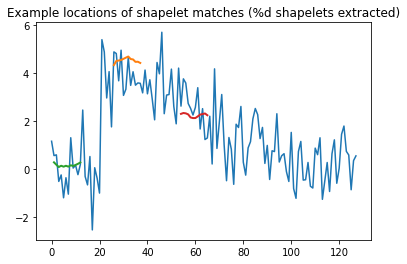

In [27]:
ts_id = 0
plt.figure()
n_shapelets = sum(shapelet_sizes.values())
plt.title("Example locations of shapelet matches "
          "(%d shapelets extracted)".format(n_shapelets))

plt.plot(X[ts_id].ravel())
for idx_shp, shp in enumerate(shp_clf.shapelets_):
    t0 = predicted_locations[ts_id, idx_shp]
    plt.plot(np.arange(t0, t0 + len(shp)), shp, linewidth=2)

### Another way of extracting shaplets

The Shapelet Transform algorithm extracts the most discriminative shapelets from a data set of time series. A shapelet is defined as a subset of consecutive points from a time series. Two criteria are made available: mutual information and F-scores.

In [32]:
from pyts.transformation import ShapeletTransform
st = ShapeletTransform(n_shapelets=5, window_sizes=[8])
st.fit(X, y)

ShapeletTransform(n_shapelets=5, window_sizes=[8])

In [33]:
len(st.shapelets_)

5

In [34]:
st.shapelets_

array([[4.28167516, 1.31811493, 1.60277031, 2.19599592, 1.77094864,
        1.71521399, 0.37938582, 3.00367038],
       [1.34880956, 3.09461573, 4.2274651 , 1.02376755, 2.96456897,
        2.58920867, 2.94694127, 1.70120242],
       [2.86576409, 1.48091371, 2.01424056, 2.98288456, 3.77972651,
        3.55721448, 2.73224035, 2.22168346],
       [0.59797821, 3.69513016, 3.86013371, 1.36924283, 3.22780396,
        1.42936456, 2.12458586, 1.04881421],
       [3.32244276, 2.08622399, 2.34982847, 1.53841713, 2.98657494,
        1.31505755, 3.5554072 , 5.0680106 ]])

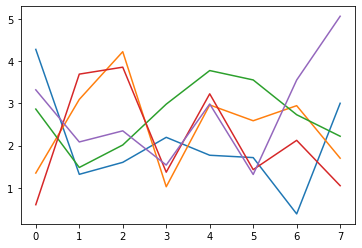

In [35]:
for s in st.shapelets_:
    plt.plot(s)

plt.show()

The indices for the corresponding shapelets in the training set. The first column consists of the indices of the samples. The second column consists of the starting indices (included) of the shapelets. The third column consists of the ending indices (excluded) of the shapelets.

In [36]:
st.indices_

array([[ 2, 56, 64],
       [ 6, 55, 63],
       [ 5, 60, 68],
       [ 2, 65, 73],
       [11, 66, 74]])

In [37]:
st.scores_

array([0.72282047, 0.73922258, 0.76154401, 0.77463925, 0.84408369])

### Shaplet + classification 


In [38]:
from pyts.classification import LearningShapelets
shp_clf = LearningShapelets(random_state=42, tol=0.01)

In [39]:
shp_clf.fit(X, y)

/Users/narets/opt/anaconda3/envs/generic_latest/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass classes=[0 1 2], y=[2 0 2 0 1 1 2 0 1 0 2 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/narets/opt/anaconda3/envs/generic_latest/lib/python3.7/site-packages/pyts/classification/learning_shapelets.py:589: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list(chain.from_iterable(self.shapelets_)))


LearningShapelets(random_state=42, tol=0.01)

In [40]:
shp_clf.coef_.shape

(3, 78)

In [41]:
# Select three shapelets
sel_shapelets = np.asarray([shp_clf.shapelets_[0, 0], 
                        shp_clf.shapelets_[0, 1], 
                        shp_clf.shapelets_[0, 2]])

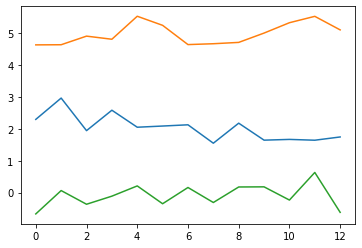

In [42]:
plt.plot(sel_shapelets[0])
plt.plot(sel_shapelets[1])
plt.plot(sel_shapelets[2])

plt.show()

### Anomaly Discovery
Parameters  
- mp: matrix profile numpy array
- k: the number of discords to discover
- ex_zone: the number of samples to exclude and set to Inf on either side of a found discord   


Returns a list of indexes represent the discord starting locations. MaxInt indicates there were no more discords that could be found due to too many exclusions or profile being too small. Discord start indices are sorted by highest matrix profile value.

In [44]:
from matrixprofile.discords import discords
anoms = discords(mp, ex_zone=3, k=5)

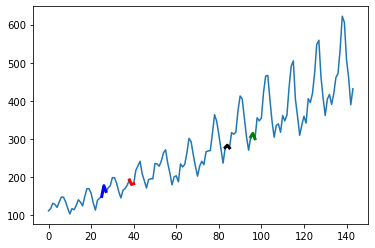

In [45]:
plt.plot(ts.values)
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo)]
for a, c in zip(anoms, colors):
    a_shape = ts.values[a:a+w]
    plt.plot(range(a, a+w), a_shape, color=c, lw=3)

plt.show()